# Exploratory research on energy data

Dataset: https://www.reach-incubator.eu/project/non-intrusive-load-monitoring/

- **Task:** Forecast power consumption for large consumers.
- **Experience:** Learn from averaged power measurements
- **Performance:** MAE, >80% total energy correctly assigned.

Expected outcomes:
To create a data value chain that allows:
- <15 Mean Absolute Error (MAE);
- \>80% Total Energy Correctly Assigned;

The research question is: how well can we forecast consumption for large consumers up to 48 hours in advance.

For Figure and data representation take inspiration from: http://activityinequality.stanford.edu/docs/activity-inequality-althoffetal-nature.pdf

In [2]:
# Above we see all raw data files
!ls -1v ../data/raw/HUE

All_Residential.txt
Holidays.csv
Residential_1.csv
Residential_2.csv
Residential_3.csv
Residential_4.csv
Residential_5.csv
Residential_6.csv
Residential_7.csv
Residential_8.csv
Residential_9.csv
Residential_10.csv
Residential_11.csv
Residential_12.csv
Residential_13.csv
Residential_14.csv
Residential_15.csv
Residential_16.csv
Residential_17.csv
Residential_18.csv
Residential_19.csv
Residential_20.csv
Residential_21.csv
Residential_22.csv
Residential_23.csv
Residential_24.csv
Residential_25.csv
Residential_26.csv
Residential_27.csv
Residential_28.csv
Solar.csv
Weather_WYJ.csv
Weather_YVR.csv


In [3]:
# Meta description of all locations
!cat ../data/raw/HUE/All_Residential.txt

House  FirstReading LastReading Cover HouseType    Facing  Region RUs EVs SN HVAC
------ ------------ ----------- ----- ------------ ------- ------ --- --- -- --------------------------
1      2012-06-01   2015-10-03  1.000 bungalow     South   YVR    1       1  FAGF + FPG + HP
2      2016-06-09   2019-11-20  0.994 duplex       North   YVR    0       2  IFRHG + FPG, NAC
3      2015-01-27   2018-01-29  0.987 modern       South   YVR    2          IFRHG + 1 BHE, NAC
4      2015-01-30   2018-01-29  0.995 character    West    YVR    1          FAGF + IFRHG, NAC
5      2015-01-30   2018-01-29  0.995 modern       South   YVR    1          IFRHG, NAC
6      2015-01-30   2018-01-29  0.997 apartment    SW      YVR    0          BHE, NAC
7      2015-01-30   2018-01-29  0.997
8      2015-02-21   2018-02-20  0.987 character    South   YVR    0          FAGF, PAC
9      2015-05-01   2018-02-21  0.996 special      South   YVR    0          IFRHG + FPG, NAC
10     2015-02-21   2018-02-20  0.995 speci

In [4]:
# Solar data
!head ../data/raw/HUE/Solar.csv
!echo ...
!tail ../data/raw/HUE/Solar.csv

date,hour,dc_output,ac_output
000-01-01,0,0,0
000-01-01,1,0,0
000-01-01,2,0,0
000-01-01,3,0,0
000-01-01,4,0,0
000-01-01,5,0,0
000-01-01,6,0,0
000-01-01,7,0,0
000-01-01,8,178.283,152.678
...
000-12-31,14,663.138,627.075
000-12-31,15,70.614,47.06
000-12-31,16,0,0
000-12-31,17,0,0
000-12-31,18,0,0
000-12-31,19,0,0
000-12-31,20,0,0
000-12-31,21,0,0
000-12-31,22,0,0
000-12-31,23,0,0


In [4]:
# Official holidays
!head ../data/raw/Holidays.csv
!echo ...
!tail ../data/raw/Holidays.csv

date,day,weekend,holiday,dst
2012-01-01,Sunday,1,,
2012-01-02,Monday,0,New Years,
2012-01-03,Tuesday,0,,
2012-01-04,Wednesday,0,,
2012-01-05,Thursday,0,,
2012-01-06,Friday,0,,
2012-01-07,Saturday,1,,
2012-01-08,Sunday,1,,
2012-01-09,Monday,0,,
...
2018-12-22,Saturday,1,,
2018-12-23,Sunday,1,,
2018-12-24,Monday,0,,
2018-12-25,Tuesday,0,Christmas Day,
2018-12-26,Wednesday,0,Boxing Day,
2018-12-27,Thursday,0,,
2018-12-28,Friday,0,,
2018-12-29,Saturday,1,,
2018-12-30,Sunday,1,,
2018-12-31,Monday,0,,


In [5]:
# Weather data for Victoria and surrounding area (WYJ)
!head ../data/raw/HUE/Weather_WYJ.csv
!echo ...
!tail ../data/raw/HUE/Weather_WYJ.csv

date,hour,temperature,humidity,pressure,weather
2015-01-01,01,0.7,88,102.31,
2015-01-01,02,1.0,88,102.26,
2015-01-01,03,0.7,90,102.22,
2015-01-01,04,0.6,90,102.18,
2015-01-01,05,-0.4,91,102.11,
2015-01-01,06,-1.0,92,102.05,
2015-01-01,07,0.2,91,102.03,
2015-01-01,08,0.3,92,101.96,
2015-01-01,09,-0.1,91,101.96,
...
2019-12-31,15,8.3,99,99.79,
2019-12-31,16,8.5,99,99.64,
2019-12-31,17,9.1,99,99.55,
2019-12-31,18,9.0,99,99.45,
2019-12-31,19,9.9,99,99.39,
2019-12-31,20,11.5,98,99.37,
2019-12-31,21,11.1,95,99.35,
2019-12-31,22,10.8,94,99.34,
2019-12-31,23,10.7,92,99.38,
2019-12-31,24,10.5,95,99.41,


In [6]:
# Weather data for Vancouver and Lower Mainland area (YVR)
!head ../data/raw/Weather_YVR.csv
!echo ...
!tail ../data/raw/Weather_YVR.csv

date,hour,temperature,humidity,pressure,weather
2012-01-01,01,2.4,74,102.63,Cloudy
2012-01-01,02,2.8,69,102.62,Cloudy
2012-01-01,03,2.8,69,102.69,Cloudy
2012-01-01,04,2.6,71,102.75,Cloudy
2012-01-01,05,2.8,69,102.78,Cloudy
2012-01-01,06,2.7,74,102.71,Rain Showers
2012-01-01,07,2.7,74,102.66,Rain Showers
2012-01-01,08,3.2,70,102.62,Cloudy
2012-01-01,09,3.6,66,102.62,Cloudy
...
2020-05-13,15,15.9,69,101.07,
2020-05-13,16,16.3,72,101.06,
2020-05-13,17,16.0,69,101.07,Mostly Cloudy
2020-05-13,18,15.5,70,101.07,
2020-05-13,19,15.3,66,101.08,
2020-05-13,20,15.0,68,101.10,Mostly Cloudy
2020-05-13,21,13.4,78,101.14,
2020-05-13,22,13.6,73,101.19,
2020-05-13,23,12.7,89,101.21,Mainly Clear
2020-05-13,24,11.6,88,101.24,


In [6]:
# Few samples from each of 28 locations
!head -n4 ../data/raw/HUE/Residential_{1..28}.csv

==> ../data/raw/HUE/Residential_1.csv <==
date,hour,energy_kWh
2012-06-01,01,1.011
2012-06-01,02,0.451
2012-06-01,03,0.505

==> ../data/raw/HUE/Residential_2.csv <==
date,hour,energy_kWh
2016-06-09,00,0.12
2016-06-09,01,0.11
2016-06-09,02,0.11

==> ../data/raw/HUE/Residential_3.csv <==
date,hour,energy_kWh
2015-01-27,00,0.54
2015-01-27,01,0.63
2015-01-27,02,0.62

==> ../data/raw/HUE/Residential_4.csv <==
date,hour,energy_kWh
2015-01-30,00,1.22
2015-01-30,01,0.84
2015-01-30,02,0.77

==> ../data/raw/HUE/Residential_5.csv <==
date,hour,energy_kWh
2015-01-30,00,0.72
2015-01-30,01,0.59
2015-01-30,02,0.56

==> ../data/raw/HUE/Residential_6.csv <==
date,hour,energy_kWh
2015-01-30,00,0.69
2015-01-30,01,0.57
2015-01-30,02,0.43

==> ../data/raw/HUE/Residential_7.csv <==
date,hour,energy_kWh
2015-05-30,00,0.52
2015-05-30,01,0.47
2015-05-30,02,0.42

==> ../data/raw/HUE/Residential_8.csv <==
date,hour,energy_kWh
2015-02-21,00,0.57
2015-02-21,01,0.52
2015-02-21,02,0.57

==> ../data/raw/HUE/Residenti

In [8]:
from collections import defaultdict
from typing import List

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from glob import glob
from pathlib import Path

import re


def atoi(text):
    return int(text) if text.isdigit() else text


def natural_keys(text):
    """
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    """
    return [atoi(c) for c in re.split(r"(\d+)", text)]


plt.style.use(["science", "notebook"])

pd.set_option("display.max_columns", 100)

In [9]:
# Manually tweaked metadata from '../data/raw/All_Residential.txt'
metadata = """
House  FirstReading LastReading Cover HouseType    Facing  Region RUs EVs SN HVAC
------ ------------ ----------- ----- ------------ ------- ------ --- --- -- --------------------------
1      2012-06-01   2015-10-03  1.000 bungalow     South   YVR    1    0    1  FAGF + FPG + HP
2      2016-06-09   2019-11-20  0.994 duplex       North   YVR    0    0    2  IFRHG + FPG, NAC
3      2015-01-27   2018-01-29  0.987 modern       South   YVR    2    0    0  IFRHG + 1 BHE, NAC
4      2015-01-30   2018-01-29  0.995 character    West    YVR    1    0    0  FAGF + IFRHG, NAC
5      2015-01-30   2018-01-29  0.995 modern       South   YVR    1    0    0  IFRHG, NAC
6      2015-01-30   2018-01-29  0.997 apartment    SW      YVR    0    0    0  BHE, NAC
7      2015-01-30   2018-01-29  0.997 ???          ???     ???    ?    ?    ?  ???
8      2015-02-21   2018-02-20  0.987 character    South   YVR    0    0    0  FAGF, PAC
9      2015-05-01   2018-02-21  0.996 special      South   YVR    0    0    0  IFRHG + FPG, NAC
10     2015-02-21   2018-02-20  0.995 special      South   YVR    0    0    0  FAGF, NAC
11     2015-02-21   2018-02-20  0.990 duplex       North   YVR    0    0    0  FAGF + IFRHE + 1 BHE, NAC
12     2015-02-21   2018-02-20  0.992 apartment    NW      YVR    0    0    0  IFRHG, NAC
13     2015-02-21   2018-02-20  0.998 special      North   YVR    1    0    0  FAGF, NAC
14     2015-02-21   2018-02-20  0.995 modern       South   YVR    1    0    0  IFRHG, NAC
15     2015-09-29   2018-02-20  0.995 bungalow     ENE     WYJ    1    0    0  FAGF, NAC
16     2017-11-01   2019-02-18  0.881 apartment    NE      YVR    0    0    0  BHE, NAC
17     2016-06-01   2017-04-29  0.996 apartment    SW      YVR    0    0    0  BHE, NAC
18     2015-03-16   2018-03-15  0.986 bungalow     East    YVR    0    85   0  FAGF, PAC
19     2015-03-26   2018-03-25  0.993 special      West    YVR    0    0    0  FAGF, NAC
20     2015-08-21   2018-04-20  0.998 character    North   YVR    0    0    0  WRHIR, NAC
21     2017-11-01   2018-06-04  0.989 laneway      West    YVR    0    0    0  IFRHG, NAC
22     2016-06-29   2018-06-05  0.996 apartment    South   YVR    0    0    0  BHE, NAC
23     2017-07-27   2020-04-05  0.985 apartment    SE      YVR    0    0    0  BHE, NAC, FPG
24     2017-05-13   2020-05-12  0.998 modern       South   YVR    0    0    0  FAGF, FAC
25     2017-05-15   2020-05-14  0.994 character    South   YVR    0    0    0  IFRHG, NAC
26     2019-11-29   2020-05-20  0.997 apartment    NNW     YVR    0    0    0  GEOTH, NAC
27     2019-03-06   2020-05-20  0.997 apartment    NW      YVR    0    0    0  BHE, NAC
28     2018-08-01   2020-05-19  0.998 special      North   YVR    0    0    0  FAGF + 1 FPE + 2 FPG, NAC
"""


def transform_metadata(metadata=metadata):
    """Transformation function for metadata. HVAC is replaced by "almost" hot-encoded fields."""

    # Simple replace operations
    metadata = (
        metadata.replace("South", "S")
        .replace("North", "N")
        .replace("West", "W")
        .replace("East", "E")
        .replace(",", " +")
    )

    metadata = metadata.split("\n")
    metadata = list(filter(None, metadata))

    columns = metadata.pop(0).split()  # Row with column names
    metadata.pop(0)  # drop row with dashes

    # These are meta columns, which replace HVAC
    extra_labels = ["FAGF", "HP", "FPG", "FPE", "IFRHG", "NAC", "FAC", "PAC", "BHE", "IFRHE", "WRHIR", "GEOTH"]
    columns = columns[:-1] + extra_labels

    _metadata = []
    for row in metadata:
        row = row.split()

        meta_rows = " ".join(row[10:]).split(" + ")

        params = defaultdict(lambda: 0)
        for meta_row in meta_rows:
            meta_row = meta_row.split()
            if len(meta_row) > 1:
                assert len(meta_row) == 2
                value, key = meta_row
            else:
                value, key = 1, meta_row[0]

            params[key] = int(value)

        params = [params[key] for key in extra_labels]

        row = row[:10] + params

        _metadata.append(row)

    df_meta = pd.DataFrame(data=_metadata, columns=columns)
    # pd.to_datetime(df['date'].astype(str) + ' ' + df['hour'].astype(str) + ':00:00')

    df_meta.FirstReading = pd.to_datetime(df_meta.FirstReading)
    df_meta.LastReading = pd.to_datetime(df_meta.LastReading)
    for col in ["Cover", "RUs", "EVs", "SN"]:
        df_meta[col] = pd.to_numeric(df_meta[col], errors="coerce")

    df_meta["House"] = df_meta["House"].apply(int)

    # (arbitrary fixes)

    return df_meta


display(transform_metadata())

display(transform_metadata().info())

# Household #7, #18 has invalid data. #15 is in different region.

,House,FirstReading,LastReading,Cover,HouseType,Facing,Region,RUs,EVs,SN,FAGF,HP,FPG,FPE,IFRHG,NAC,FAC,PAC,BHE,IFRHE,WRHIR,GEOTH
0,1,2012-06-01,2015-10-03,1.000,bungalow,S,YVR,1.0,0.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0
1,2,2016-06-09,2019-11-20,0.994,duplex,N,YVR,0.0,0.0,2.0,0,0,1,0,1,1,0,0,0,0,0,0
2,3,2015-01-27,2018-01-29,0.987,modern,S,YVR,2.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0,0,0
3,4,2015-01-30,2018-01-29,0.995,character,W,YVR,1.0,0.0,0.0,1,0,0,0,1,1,0,0,0,0,0,0
4,5,2015-01-30,2018-01-29,0.995,modern,S,YVR,1.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0
5,6,2015-01-30,2018-01-29,0.997,apartment,SW,YVR,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0
6,7,2015-01-30,2018-01-29,0.997,???,???,???,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
7,8,2015-02-21,2018-02-20,0.987,character,S,YVR,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0
8,9,2015-05-01,2018-02-21,0.996,special,S,YVR,0.0,0.0,0.0,0,0,1,0,1,1,0,0,0,0,0,0
9,10,2015-02-21,2018-02-20,0.995,special,S,YVR,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   House         28 non-null     int64         
 1   FirstReading  28 non-null     datetime64[ns]
 2   LastReading   28 non-null     datetime64[ns]
 3   Cover         28 non-null     float64       
 4   HouseType     28 non-null     object        
 5   Facing        28 non-null     object        
 6   Region        28 non-null     object        
 7   RUs           27 non-null     float64       
 8   EVs           27 non-null     float64       
 9   SN            27 non-null     float64       
 10  FAGF          28 non-null     int64         
 11  HP            28 non-null     int64         
 12  FPG           28 non-null     int64         
 13  FPE           28 non-null     int64         
 14  IFRHG         28 non-null     int64         
 15  NAC           28 non-null     int64       

None

In [10]:
# Preprocess the data


def transform_residential_datasets() -> List[pd.DataFrame]:
    datasets_path = Path("../data/raw/Residential_*.csv").resolve()

    filenames = glob(str(datasets_path))
    filenames.sort(key=natural_keys)

    dfs = []
    for filename in filenames:
        df = pd.read_csv(filename)

        df["ts"] = pd.to_datetime(df["date"].astype(str) + " " + df["hour"].astype(str) + ":00:00")
        df["energy"] = df["energy_kWh"] * 1000

        df.set_index("ts", inplace=True)
        df.drop(["date", "hour", "energy_kWh"], axis=1, inplace=True)

        dfs.append(df)

    return dfs


transform_residential_datasets()[0]

,energy
ts,
2012-06-01 01:00:00,1011.0
2012-06-01 02:00:00,451.0
2012-06-01 03:00:00,505.0
2012-06-01 04:00:00,441.0
2012-06-01 05:00:00,468.0
...,...
2015-10-02 20:00:00,2101.0
2015-10-02 21:00:00,1646.0
2015-10-02 22:00:00,1319.0


In [11]:
!head ../data/raw/Weather_YVR.csv


# Transform weather
def transform_wather_dataset(location: str = "yvr"):
    location = location.upper()

    datasets_path = Path(f"../data/raw/Weather_{location}.csv").resolve()

    df = pd.read_csv(datasets_path)

    df["hour"] -= 1

    df["ts"] = pd.to_datetime(df["date"].astype(str) + " " + df["hour"].astype(str) + ":00:00")

    df.set_index("ts", inplace=True)
    df.drop(["date", "hour"], axis=1, inplace=True)

    df["weather"] = df.weather.fillna("")

    # Fill missing values
    df["temperature"] = df["temperature"].interpolate(method="linear", limit=5)
    df["humidity"] = df["humidity"].interpolate(method="linear", limit=5)
    df["pressure"] = df["pressure"].interpolate(method="linear", limit=5)

    return df

date,hour,temperature,humidity,pressure,weather
2012-01-01,01,2.4,74,102.63,Cloudy
2012-01-01,02,2.8,69,102.62,Cloudy
2012-01-01,03,2.8,69,102.69,Cloudy
2012-01-01,04,2.6,71,102.75,Cloudy
2012-01-01,05,2.8,69,102.78,Cloudy
2012-01-01,06,2.7,74,102.71,Rain Showers
2012-01-01,07,2.7,74,102.66,Rain Showers
2012-01-01,08,3.2,70,102.62,Cloudy
2012-01-01,09,3.6,66,102.62,Cloudy


In [12]:
transform_wather_dataset(location="yvr")

,temperature,humidity,pressure,weather
ts,,,,
2012-01-01 00:00:00,2.4,74.0,102.63,Cloudy
2012-01-01 01:00:00,2.8,69.0,102.62,Cloudy
2012-01-01 02:00:00,2.8,69.0,102.69,Cloudy
2012-01-01 03:00:00,2.6,71.0,102.75,Cloudy
2012-01-01 04:00:00,2.8,69.0,102.78,Cloudy
...,...,...,...,...
2020-05-13 19:00:00,15.0,68.0,101.10,Mostly Cloudy
2020-05-13 20:00:00,13.4,78.0,101.14,
2020-05-13 21:00:00,13.6,73.0,101.19,


In [13]:
transform_wather_dataset(location="WYJ")

,temperature,humidity,pressure,weather
ts,,,,
2015-01-01 00:00:00,0.7,88,102.31,
2015-01-01 01:00:00,1.0,88,102.26,
2015-01-01 02:00:00,0.7,90,102.22,
2015-01-01 03:00:00,0.6,90,102.18,
2015-01-01 04:00:00,-0.4,91,102.11,
...,...,...,...,...
2019-12-31 19:00:00,11.5,98,99.37,
2019-12-31 20:00:00,11.1,95,99.35,
2019-12-31 21:00:00,10.8,94,99.34,


In [14]:
# Invalid values in the weather data?
data = transform_wather_dataset(location="yvr")
is_NaN = data.isnull()

row_has_NaN = is_NaN.any(axis=1)

rows_with_NaN = data[row_has_NaN]

rows_with_NaN


data["2013-03-30 23:00:00":"2013-03-31 23:00:00"]

,temperature,humidity,pressure,weather
ts,,,,
2013-03-31 00:00:00,9.0,84.0,101.91,Mainly Clear
2013-03-31 01:00:00,8.1,76.0,101.89,Mainly Clear
2013-03-31 02:00:00,7.2,78.0,101.86,Mainly Clear
2013-03-31 03:00:00,7.4,77.0,101.81,Clear
2013-03-31 04:00:00,5.0,83.0,101.79,Clear
2013-03-31 05:00:00,7.1,78.0,101.78,Clear
2013-03-31 06:00:00,5.6,87.0,101.79,Clear
2013-03-31 07:00:00,7.3,85.0,101.79,Clear
2013-03-31 08:00:00,10.0,86.0,101.77,Mainly Clear


In [15]:
import holidays
from datetime import datetime as dt, date, timedelta


def transform_days():
    raise DeprecationWarning()
    df = pd.read_csv("../data/raw/Holidays.csv")
    df = df.drop(["dst"], axis=1)

    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    # TODO: Merge weekends and holidays
    df.day = df.day.apply(lambda x: weekdays.index(x))
    df.holiday = df.holiday.apply(lambda x: not pd.isna(x))
    df.weekend = df.weekend.apply(bool)

    df.date = pd.to_datetime(df.date)

    df = df.set_index("date")
    # display(df.head())

    ca_holidays = holidays.Canada()

    start = date.fromisoformat("2012-01-01")
    today = date.today()

    holiday = [start + timedelta(days=x) for x in range((today - start).days)]
    holiday = [(d, d in ca_holidays) for d in holiday]

    holiday = pd.DataFrame(holiday, columns=("date", "holiday2"))
    holiday.date = pd.to_datetime(holiday.date)

    holiday = holiday.set_index("date")
    # display(holiday)

    # print(df.info())
    # print(holiday.info())

    df = df.join(holiday, how="left")

    display(df.head())
    display(df.tail())

    display(df[df.holiday != df.holiday2])


def transform_days():
    start, today = date.fromisoformat("2012-01-01"), date.today()
    days_list = [start + timedelta(days=x) for x in range((today - start).days)]

    ca_holidays = holidays.Canada()
    holiday = [(d, d in ca_holidays) for d in days_list]

    df = pd.DataFrame(holiday, columns=("date", "is_holiday"))
    df.date = pd.to_datetime(df.date)
    df = df.set_index("date")

    return df


transform_days().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3817 entries, 2012-01-01 to 2022-06-13
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   is_holiday  3817 non-null   bool 
dtypes: bool(1)
memory usage: 33.5 KB


### Examination of micro- and macro-behaviour
- **micro**-behaviour is on per-household
  - seasonal changes
  - ...
  
- **macro**-behaviour is global behaviour
  - ???

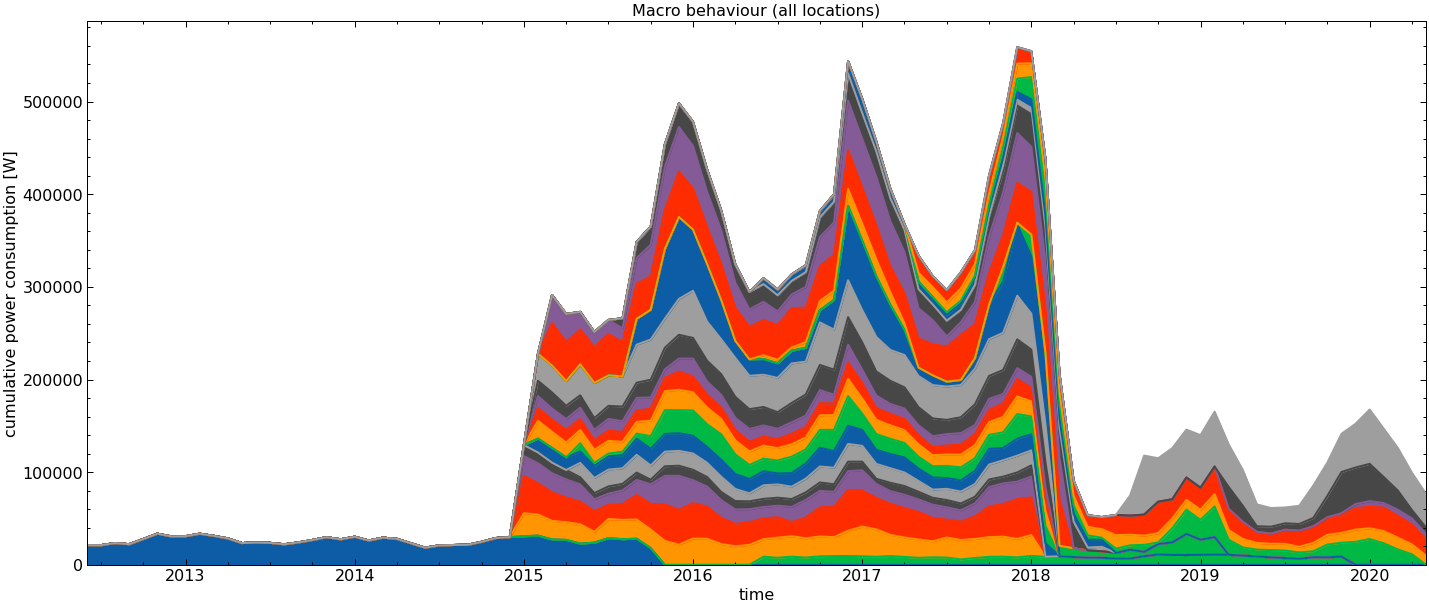

In [16]:
# Macro changes
dfs = transform_residential_datasets()
dfs = [df.resample("1D").sum().resample("1M").mean() for df in dfs]

df = pd.concat(dfs, axis=1).fillna(0.0)
df.columns = [f"H{i+1}" for i in range(28)]
# print(df)

ax = df.plot.area(figsize=(24, 10))

ax.legend("", fontsize="small").set_visible(False)
ax.set_title("Macro behaviour (all locations)")
ax.set_xlabel("time")
ax.set_ylabel("cumulative power consumption [W]")
# f, ax = plt.subplots()


# ax.stackplot(df.index, df[list(df.columns)])

# ax.set_ylabel('Energy [W]')
plt.show()

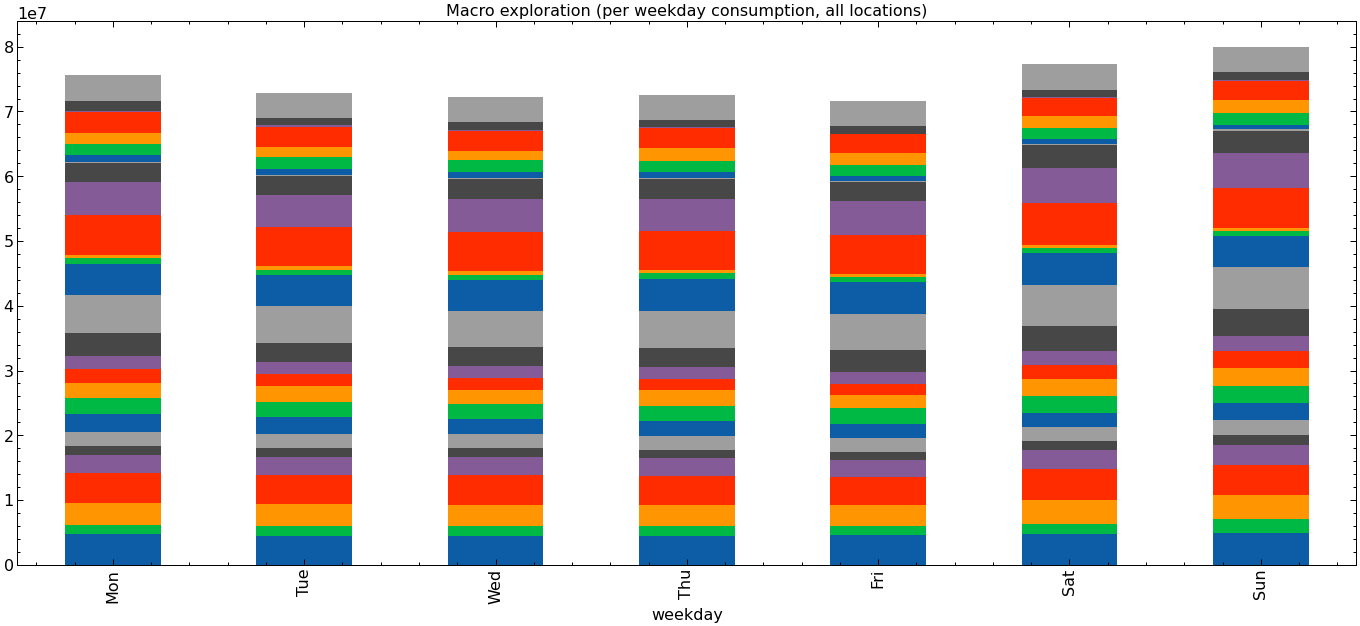

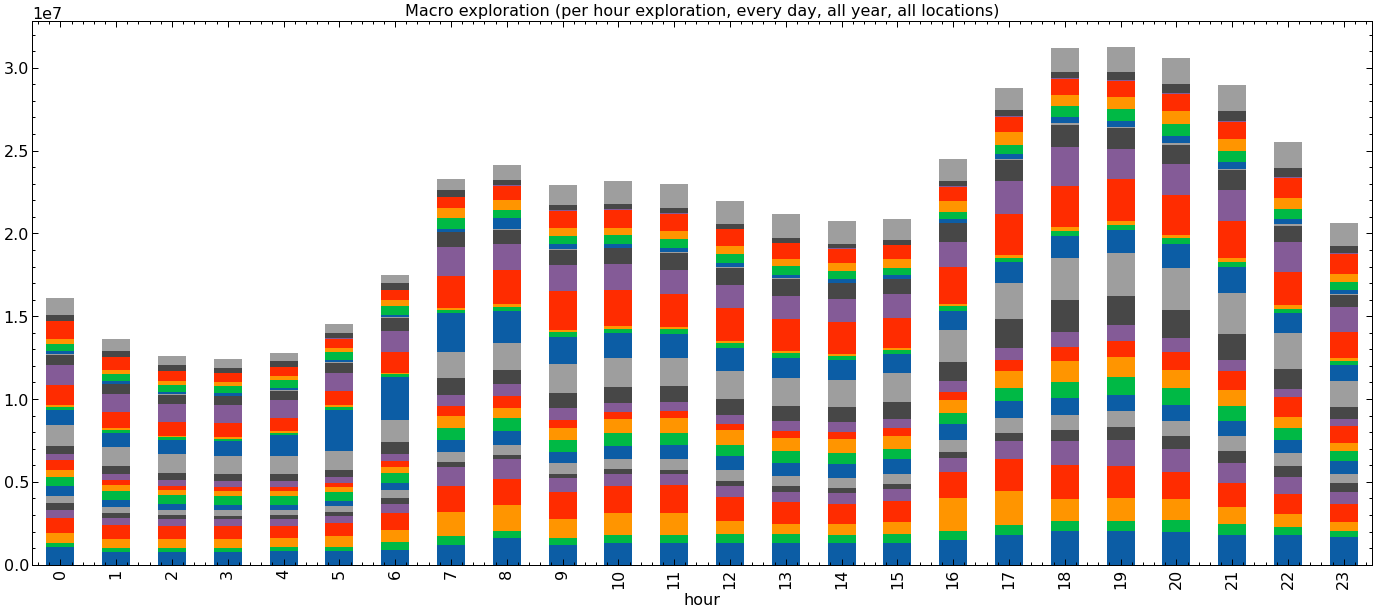

In [17]:
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Hour of a day behaviour (similar to Matevž's approach)
dfs = transform_residential_datasets()
dfs = [df.resample("1H").sum() for df in dfs]


df = pd.concat(dfs, axis=1).fillna(0.0)
columns = [f"H{i+1}" for i in range(28)]
df.columns = columns

# normalize per hour
# stack power consumption per hour of the day (week day)
df["weekday"] = df.index.weekday
dfavg = df.groupby(by="weekday").sum()
ax = dfavg[columns].plot.bar(stacked=True, figsize=(24, 10))
ax.xaxis.set_ticklabels(weekdays)
ax.set_title("Macro exploration (per weekday consumption, all locations)")
ax.legend().set_visible(False)
plt.show()

df["hour"] = df.index.hour
dfavg = df.groupby(by="hour").sum()
ax = dfavg[columns].plot.bar(stacked=True, figsize=(24, 10))
ax.set_title("Macro exploration (per hour exploration, every day, all year, all locations)")
ax.legend().set_visible(False)
plt.show()

### Micro expliration

'Relative consumption in relation to the highest observed consumption per household.'

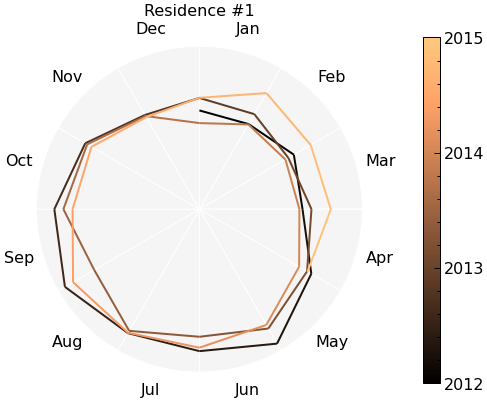

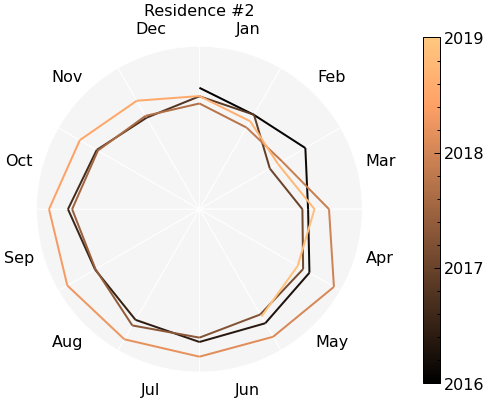

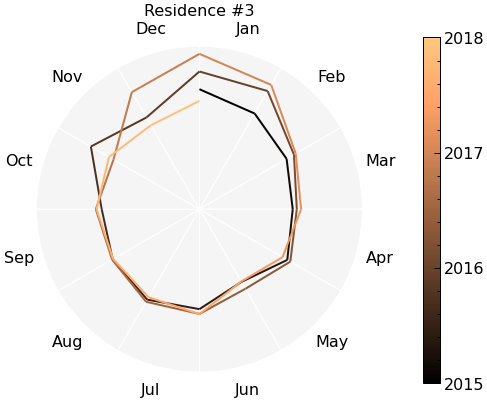

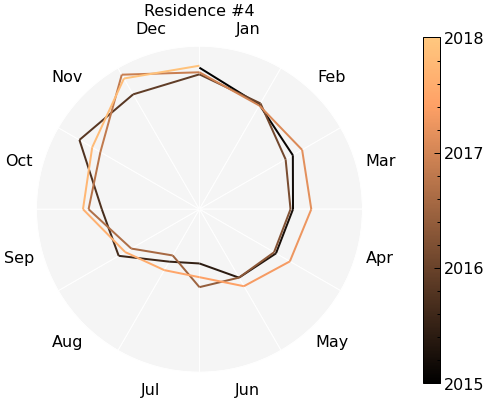

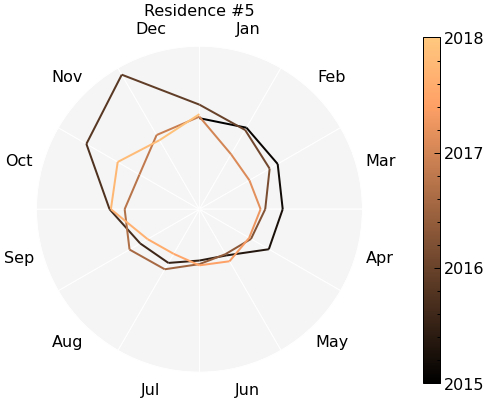

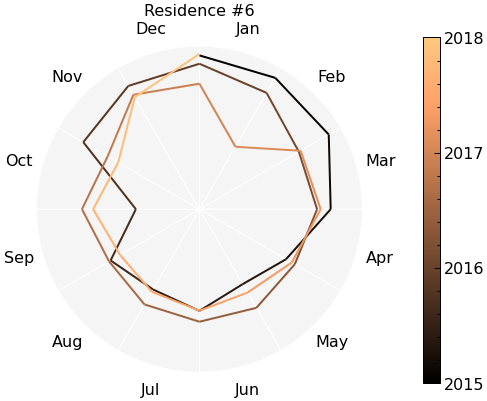

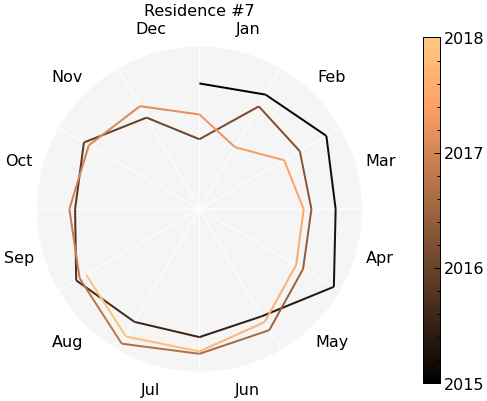

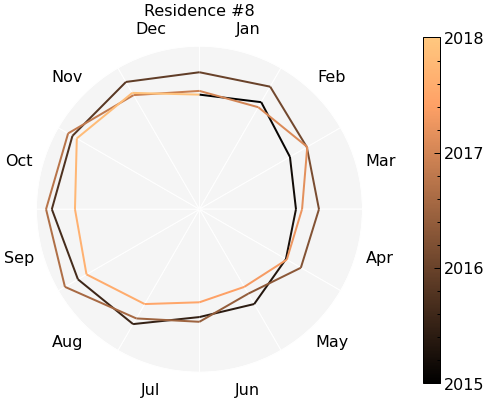

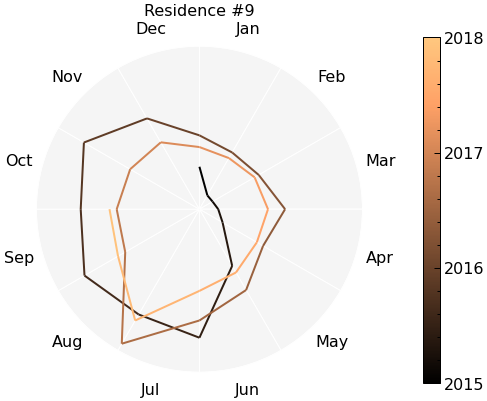

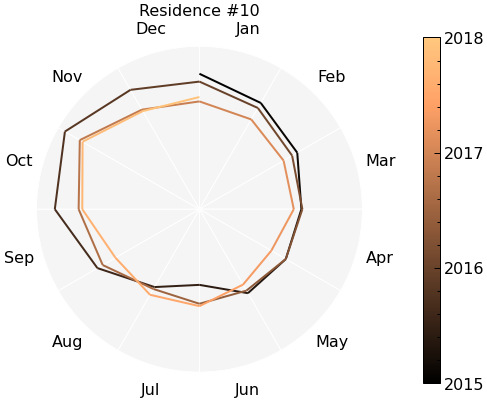

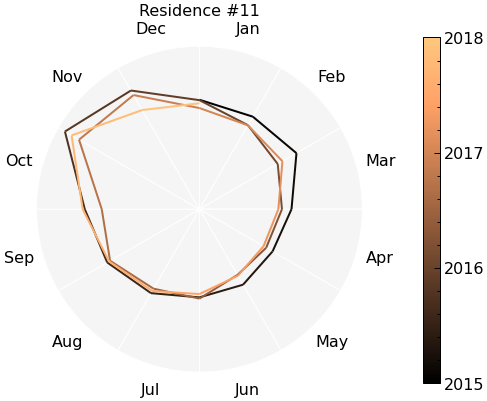

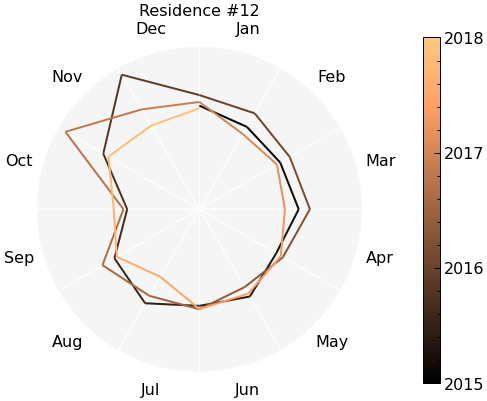

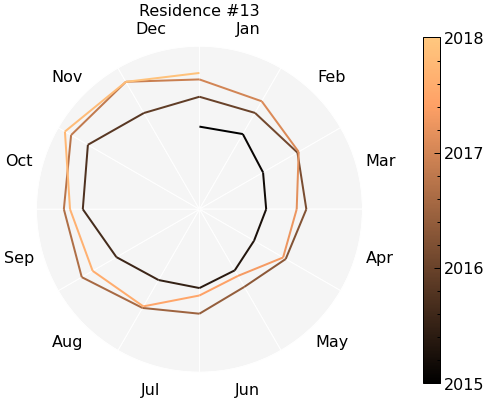

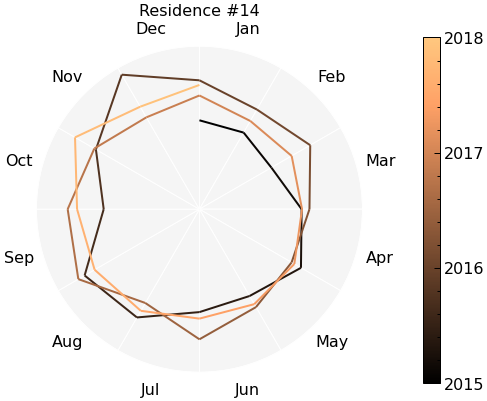

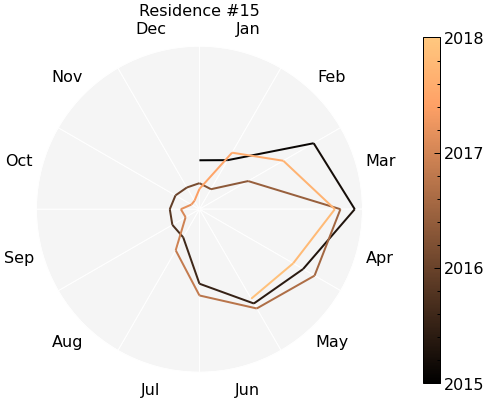

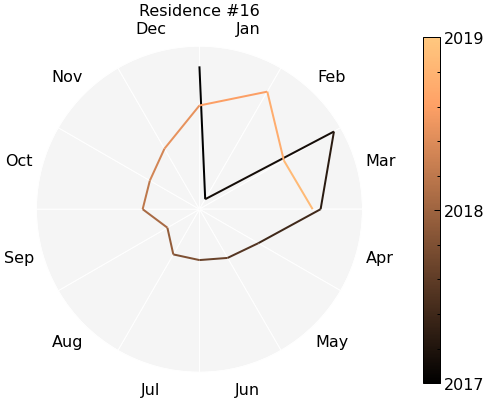

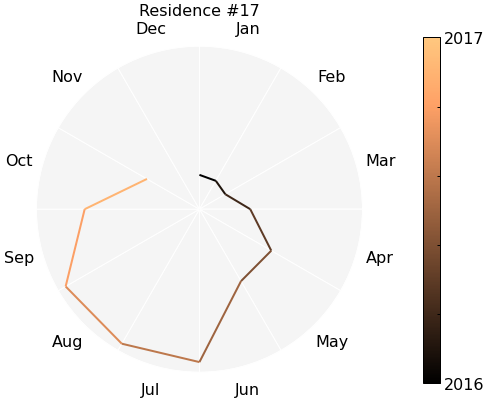

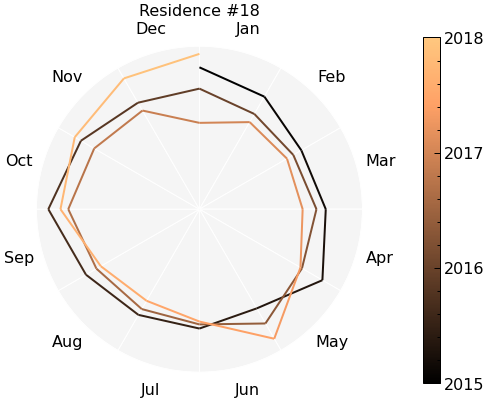

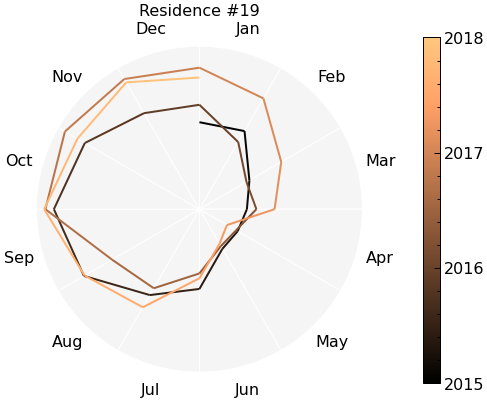

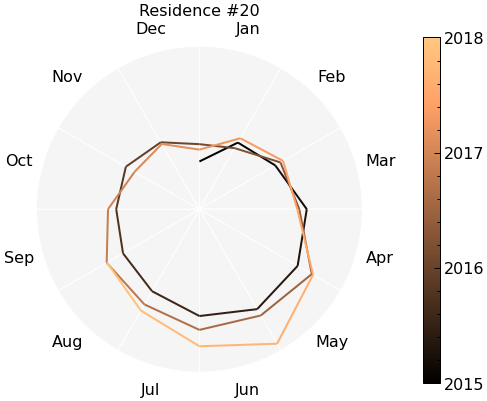

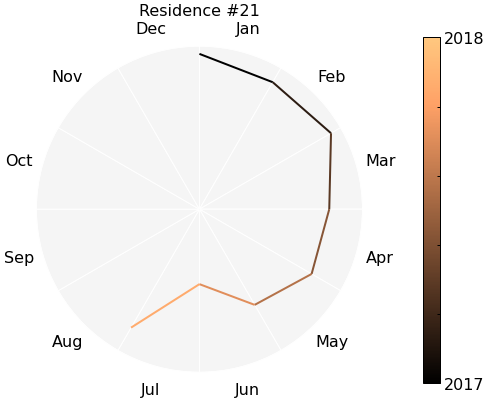

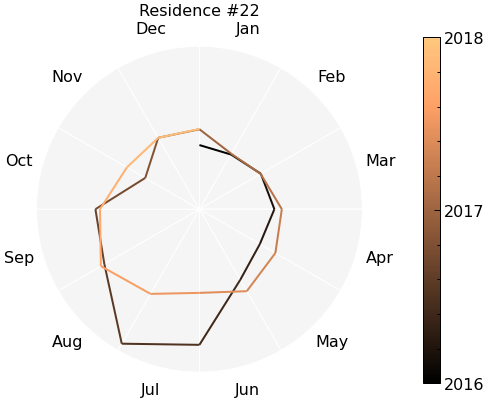

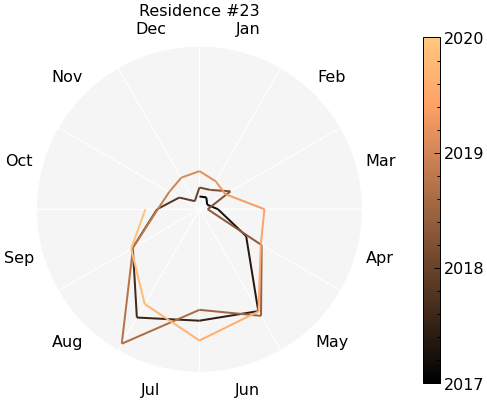

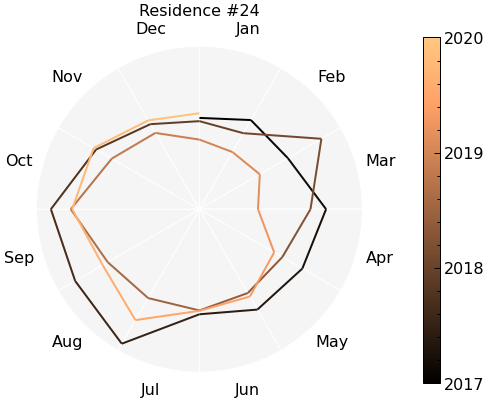

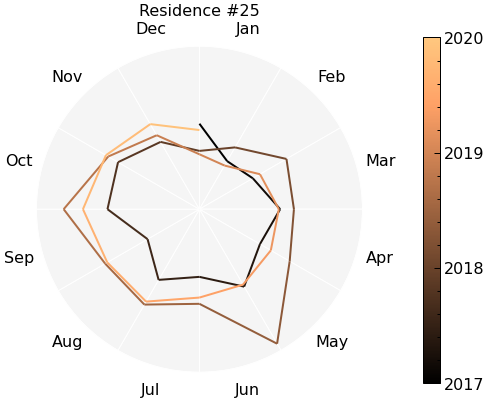

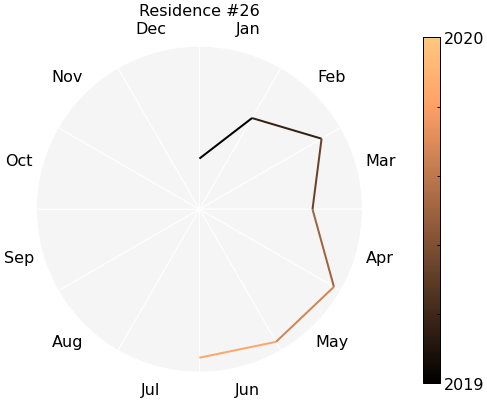

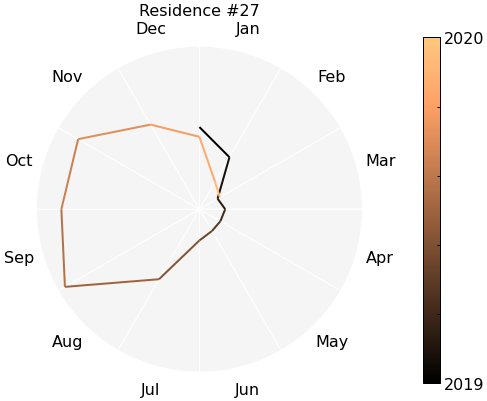

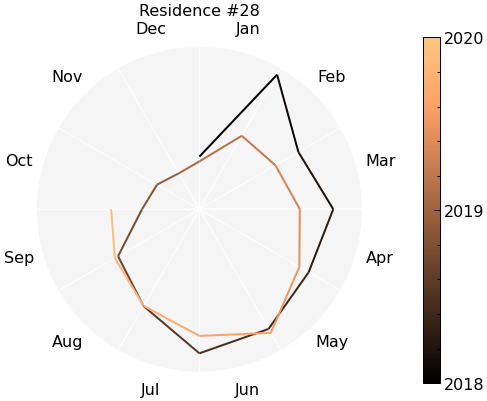

In [18]:
import matplotlib as mpl

dfs = transform_residential_datasets()
dfs = [df.resample("M").mean() for df in dfs]

USAGE_MAX = max([df.energy.max() for df in dfs])


def format_axes(ax, step=2 * np.pi / 12):
    """SRC: https://matplotlib.org/matplotblog/posts/animated-polar-plot/"""

    # ax.set_facecolor('w')

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    ax.grid(None, axis="x")
    ax.grid(True, axis="y", color="w", linestyle="--", linewidth=0.1)

    ax.set_ylim(0.0, 1.0)

    middles = np.arange(step / 2, 2 * np.pi, step)

    bars = ax.bar(middles, 1.0, width=step, bottom=0.0, color="whitesmoke", edgecolor="w", zorder=0)

    ax.set_xticks(np.arange(step / 2, 2 * np.pi, step))
    ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    ax.set_yticks([])

    # ax.legend(handles=legend_elements, loc='center', fontsize=13, frameon=False)
    ax.tick_params(pad=17, which="major", axis="x")
    ax.set_axisbelow(False)

    for spine in ax.spines:
        ax.spines[spine].set_color("w")


def multicolor_line(x, y, ax, cmap="hsv", norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """src: https://stackoverflow.com/a/36074775/3678682"""

    def make_segments(x, y):
        assert len(x) == len(y), f"{len(x)} != {len(y)}"

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        return segments

    z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mpl.collections.LineCollection(segments, array=z, cmap=cmap)
    ax.add_collection(lc)
    # ax.plot(x, y)
    return lc


display("Relative consumption in relation to the highest observed consumption per household.")


for idx, df in enumerate(dfs):
    fig = plt.figure(figsize=(8, 6))
    ax1 = plt.subplot(111, projection="polar")

    step = 2 * np.pi / 12

    format_axes(ax1)

    n_samples = len(df)

    years = list(df.index.year.unique().astype(int))

    if len(years) == 1:
        years.insert(0, years[0] - 1)

    ax2 = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    norm = mpl.colors.Normalize(min(years), max(years))
    cmap = plt.get_cmap("copper")

    lines = multicolor_line(np.arange(n_samples) * step, df.energy / (df.energy.max() * 1.05), ax=ax1, cmap=cmap)

    cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, ticks=years, format="%d")
    ax1.set_title(f"Residence #{idx+1}")

    plt.show()

# Putting Things Together (The Actual Estimator)

In [19]:
# Households without #7 (invalid data), #15 (different region) #18 (invalid data).
locations = transform_metadata()
ignore_list = [
    7,
]  # [7, 15, 18]

locations = locations[~locations["House"].isin(ignore_list)]


measurements = transform_residential_datasets()
meta_columns = tuple(locations.columns)[4:]

dfs = []

for _, row in locations.iterrows():
    house_id = row["House"] - 1
    data = measurements[house_id]

    # Add meta data about environment
    for key in meta_columns:
        data[key] = row[key]

    # Add weather data
    region = row["Region"]
    weather_data = transform_wather_dataset(location=region)
    data = data.join(weather_data)

    # Holidays
    holiday = transform_days()
    data["date"] = pd.to_datetime(data.index.date)
    data = data.join(holiday, on="date")
    data["weekday"] = data["date"].apply(lambda x: x.weekday())
    data.is_holiday = data.is_holiday.astype(int)

    # percentage of year completed
    year_start = lambda ts: dt(ts.year, month=1, day=1)
    year_end = lambda ts: dt(ts.year + 1, month=1, day=1)
    percent_of_year = (
        lambda ts: (ts - year_start(ts)).total_seconds() / (year_end(ts) - year_start(ts)).total_seconds()
    )
    data["year_percent"] = data.index.to_series().apply(percent_of_year)

    # Percent of the day
    day_start = lambda ts: dt(year=ts.year, month=ts.month, day=ts.day)
    day_end = lambda ts: day_start(ts) + timedelta(days=1)
    data["day_percent"] = data.index.to_series().apply(
        lambda ts: (ts - day_start(ts)).total_seconds() / (day_end(ts) - day_start(ts)).total_seconds()
    )

    # TODO: Percent of week
    data["week_percent"] = data["date"].apply(lambda x: x.weekday() / 6.0)

    # TODO: Azymuth of sun and theoretical sun exposure (pysolar)

    data = data.drop("date", axis=1)

    data["energy+1H"] = data["energy"].shift(-1)  # 1 hour ahead
    # data['energy+2H'] = data['energy'].shift(-2) # 1 hour ahead
    # data['energy+3H'] = data['energy'].shift(-3) # 1 hour ahead

    # TODO: For now we drop invalid columns
    # display(data[data.weather.isna()])
    # data = data.dropna()

    # Arbitrary workaround
    data.weather.fillna(value="", inplace=True)
    # data.drop(['weather'], axis=1, inplace=True)

    dfs.append(data)

data = pd.concat(dfs)

In [20]:
# How many invalid values do we have?
is_NaN = data.isnull()

row_has_NaN = is_NaN.any(axis=1)

rows_with_NaN = data[row_has_NaN]


with pd.option_context("display.max_rows", 100, "display.max_columns", 100):
    display(rows_with_NaN)

print(f"Which represents {len(rows_with_NaN) / len(data) * 100:.3f}% of the dataset")

,energy,HouseType,Facing,Region,RUs,EVs,SN,FAGF,HP,FPG,FPE,IFRHG,NAC,FAC,PAC,BHE,IFRHE,WRHIR,GEOTH,temperature,humidity,pressure,weather,is_holiday,weekday,year_percent,day_percent,week_percent,energy+1H
ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-30 23:00:00,1409.0,bungalow,S,YVR,1.0,0.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,,0,5,0.243721,0.958333,0.833333,1318.0
2013-05-24 02:00:00,553.0,bungalow,S,YVR,1.0,0.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,,0,4,0.392009,0.083333,0.666667,522.0
2013-05-28 01:00:00,630.0,bungalow,S,YVR,1.0,0.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,,0,1,0.402854,0.041667,0.166667,566.0
2013-06-13 01:00:00,574.0,bungalow,S,YVR,1.0,0.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,,0,3,0.446689,0.041667,0.500000,550.0
2013-06-13 05:00:00,546.0,bungalow,S,YVR,1.0,0.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,,0,3,0.447146,0.208333,0.500000,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-19 19:00:00,3060.0,special,N,YVR,0.0,0.0,0.0,1,0,2,1,0,1,0,0,0,0,0,0,NaN,NaN,NaN,,0,1,0.381944,0.791667,0.166667,2940.0
2020-05-19 20:00:00,2940.0,special,N,YVR,0.0,0.0,0.0,1,0,2,1,0,1,0,0,0,0,0,0,NaN,NaN,NaN,,0,1,0.382058,0.833333,0.166667,1970.0
2020-05-19 21:00:00,1970.0,special,N,YVR,0.0,0.0,0.0,1,0,2,1,0,1,0,0,0,0,0,0,NaN,NaN,NaN,,0,1,0.382172,0.875000,0.166667,2130.0


Which represents 1.162% of the dataset


In [21]:
import sklearn as skl
from sklearn import preprocessing, linear_model, model_selection, pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn import tree, svm, ensemble, linear_model, metrics

import xgboost as xgb

try:
    from sklearnex import patch_sklearn

    patch_sklearn()
except ImportError:
    pass

# display(sorted(skl.metrics.SCORERS.keys()))
# display(data.head())

print(data.info())
# print(data.weather.unique())

weather_categories = [sorted(list(data.weather.unique()))]
facing_categories = [sorted(list(data.Facing.unique()))]
house_categories = [sorted(list(data.HouseType.unique()))]
region_categories = [sorted(list(data.Region.unique()))]

print(weather_categories)

mapper = DataFrameMapper(
    [
        (["HouseType"], preprocessing.OneHotEncoder(categories=house_categories)),
        (["Facing"], preprocessing.OneHotEncoder(categories=facing_categories)),
        (["Region"], preprocessing.OneHotEncoder(categories=region_categories)),
        (["weather"], preprocessing.OneHotEncoder(categories=weather_categories)),
        # (['weekday'], preprocessing.OneHotEncoder(categories='auto')),
        # (['pressure'], preprocessing.StandardScaler()),
        # (['humidity'], preprocessing.MinMaxScaler()),
    ],
    default=None,
)

mapper.fit_transform(data).shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 592630 entries, 2012-06-01 01:00:00 to 2020-05-19 23:00:00
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   energy        587659 non-null  float64
 1   HouseType     592630 non-null  object 
 2   Facing        592630 non-null  object 
 3   Region        592630 non-null  object 
 4   RUs           592630 non-null  float64
 5   EVs           592630 non-null  float64
 6   SN            592630 non-null  float64
 7   FAGF          592630 non-null  int64  
 8   HP            592630 non-null  int64  
 9   FPG           592630 non-null  int64  
 10  FPE           592630 non-null  int64  
 11  IFRHG         592630 non-null  int64  
 12  NAC           592630 non-null  int64  
 13  FAC           592630 non-null  int64  
 14  PAC           592630 non-null  int64  
 15  BHE           592630 non-null  int64  
 16  IFRHE         592630 non-null  int64  
 17  WRHIR         

/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/util

(592630, 70)

In [22]:
regr = pipeline.Pipeline(
    [
        ("encoder", mapper),
        # ('regressor', ensemble.RandomForestRegressor(random_state=42, n_jobs=-1))
        # ('regressor', linear_model.LinearRegression())
        ("regressor", xgb.XGBRegressor(random_state=42)),
    ]
)

cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

sample = data.copy().dropna()
X, y = sample.drop(["energy+1H"], axis=1), sample["energy+1H"].ravel()

print(X.columns, X.shape)

# model_selection.cross_val_score(regr, X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
y_pred = model_selection.cross_val_predict(regr, X, y, cv=cv, n_jobs=1)

metrics.mean_absolute_error(y, y_pred)

Index(['energy', 'HouseType', 'Facing', 'Region', 'RUs', 'EVs', 'SN', 'FAGF',
       'HP', 'FPG', 'FPE', 'IFRHG', 'NAC', 'FAC', 'PAC', 'BHE', 'IFRHE',
       'WRHIR', 'GEOTH', 'temperature', 'humidity', 'pressure', 'weather',
       'is_holiday', 'weekday', 'year_percent', 'day_percent', 'week_percent'],
      dtype='object') (585746, 28)


/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/util

276.7351299834228

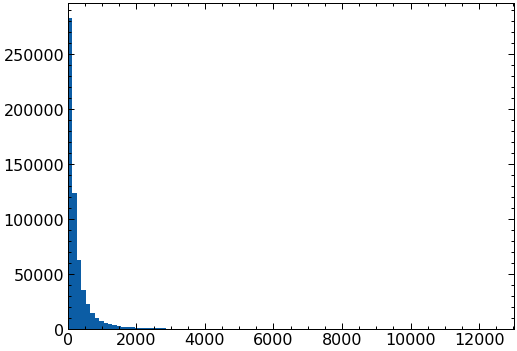

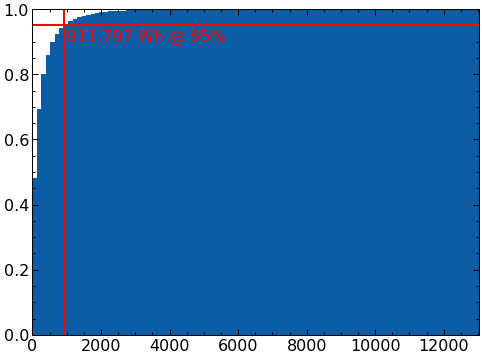

In [23]:
loss = np.abs(y - y_pred)

plt.hist(loss, bins=100, density=False)
plt.xlim(0, max(loss))
plt.show()

n, bins, patches = plt.hist(loss, bins=100, density=True, cumulative=True, histtype="stepfilled")
plt.xlim(0, max(loss))
plt.ylim(0, 1.001)

plt.axhline(0.95, xmin=0, xmax=max(loss), c="r")
n = np.array(n)
idx = np.argmax(n >= 0.95)
_x = bins[idx]
plt.axvline(_x, ymin=0, ymax=1, c="r")

plt.text(_x + 100, 0.95 - 0.05, f"{bins[idx]:.3f} Wh @ 95%", c="r", fontdict={"fontsize": 16})
plt.show()

In [24]:
regr.fit(X, y)

regr.steps[-1][-1].feature_importances_

/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/gcerar/miniconda3/envs/energy/lib/python3.8/site-packages/sklearn/util

array([0.02492723, 0.02221446, 0.00789914, 0.04569082, 0.01147397,
       0.02451667, 0.01323275, 0.02499201, 0.03349183, 0.01448108,
       0.00078577, 0.0068259 , 0.02212113, 0.08867217, 0.00530087,
       0.00806481, 0.01368014, 0.        , 0.        , 0.00269265,
       0.00177878, 0.00348287, 0.00500584, 0.00256764, 0.        ,
       0.        , 0.        , 0.        , 0.00548489, 0.00152325,
       0.00054956, 0.        , 0.00289863, 0.        , 0.00241045,
       0.        , 0.00063056, 0.00333057, 0.00406906, 0.00168826,
       0.00090248, 0.00062546, 0.        , 0.        , 0.        ,
       0.24160308, 0.03008201, 0.        , 0.02718739, 0.00708487,
       0.00736962, 0.05518341, 0.        , 0.02457993, 0.02588684,
       0.02091516, 0.0044376 , 0.06991489, 0.00895939, 0.00366558,
       0.        , 0.01348281, 0.00397812, 0.00408797, 0.00334779,
       0.00631955, 0.0092112 , 0.02469113, 0.        ], dtype=float32)

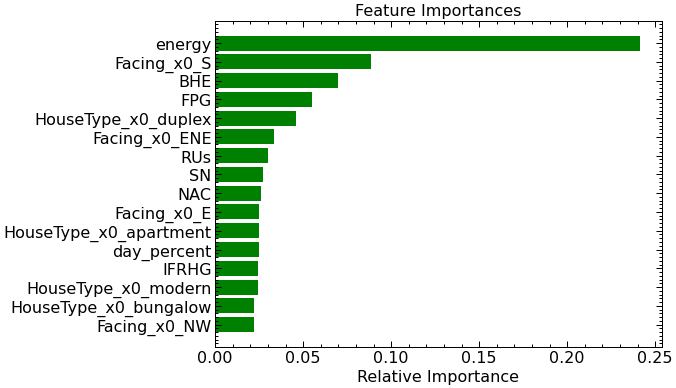

In [25]:
features = regr.steps[0][1].transformed_names_
importances = regr.steps[-1][1].feature_importances_

indices = np.argsort(importances)

plt.title("Feature Importances")
j = 16
plt.barh(range(j), importances[indices][len(indices) - j :], color="g", align="center")
plt.yticks(range(j), [features[i] for i in indices[len(indices) - j :]])
plt.xlabel("Relative Importance")
plt.show()

In [33]:
metrics.mean_absolute_error(y, y_pred)

276.7351299834228

In [42]:
metrics.mean_absolute_error(y, y_pred) / np.max(y)

0.019111542125926986

In [45]:
np.sum(y_pred > y) / len(y)

0.6175270509743132